In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams 
import scipy.linalg as la
%matplotlib inline

## Problem 1

In [2]:
def anisdiff_bw(img, N, lambda_, g, show_all=True):
    """ Run the Anisotropic Diffusion differencing scheme. 
    Operate on U inplace to optimize performance. 
    
    Inputs:
    img - array of grayscale values for an image.
    N - number of iterations
    lambda_ - stability condition (< 1/4)
    g - function to limit diffusion across boundaries in the image.
    
    """
    U = img.copy()
    
    center = U[1:-1, 1:-1]
    top_bound = U[0, 1:-1]
    left_bound = U[1:-1, 0]
    right_bound = U[1:-1, -1]
    bottom_bound = U[-1, 1:-1]
    
    for i in xrange(N):
        # center
        left = g(np.abs(U[1:-1, :-2] - center))*(U[1:-1, :-2] - center)
        right = g(np.abs(U[1:-1, 2:] - center))*(U[1:-1, 2:] - center)
        up = g(np.abs(U[:-2, 1:-1] - center))*(U[:-2, 1:-1] - center)
        down = g(np.abs(U[2:, 1:-1] - center))*(U[2:, 1:-1] - center)
        center += lambda_*(left + right + up + down)
    
        # top
        left = g(np.abs(U[0, :-2] - top_bound))*(U[0, :-2] - top_bound)
        right = g(np.abs(U[0, 2:] - top_bound))*(U[0, 2:] - top_bound)
        down = g(np.abs(U[1, 1:-1] - top_bound))*(U[1, 1:-1] - top_bound)
        top_bound += lambda_*(left + right + down)
        
        # left
        right = g(np.abs(U[1:-1, 1] - left_bound))*(U[1:-1, 1] - left_bound)
        up = g(np.abs(U[:-2, 0] - left_bound))*(U[:-2, 0] - left_bound)
        down = g(np.abs(U[2:, 0] - left_bound))*(U[2:, 0] - left_bound)
        left_bound += lambda_*(right + up + down)
        
        #right
        left = g(np.abs(U[1:-1, -2] - right_bound))*(U[1:-1, -2] - right_bound)
        up = g(np.abs(U[:-2, -1] - right_bound))*(U[:-2, -1] - right_bound)
        down = g(np.abs(U[2:, -1] - right_bound))*(U[2:, -1] - right_bound)
        right_bound += lambda_*(left + up + down)
        
        #bottom
        left = g(np.abs(U[-1, :-2] - bottom_bound))*(U[-1, :-2] - bottom_bound)
        right = g(np.abs(U[-1, 2:] - bottom_bound))*(U[-1, 2:] - bottom_bound)
        up = g(np.abs(U[-2, 1:-1] - bottom_bound))*(U[-2, 1:-1] - bottom_bound)
        bottom_bound += lambda_*(left + right + up)
        
    plt.imshow(U, cmap=plt.cm.gray)
    plt.show()

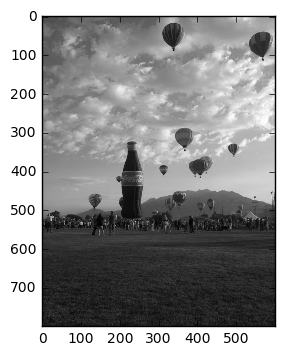

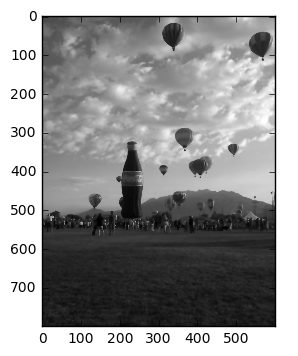

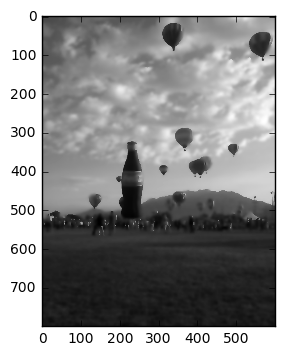

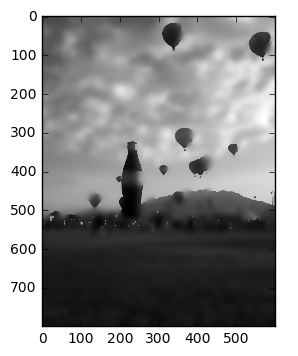

In [3]:
g = lambda x : np.exp(-(10*x)**2)
picture = plt.imread('balloon.jpg').mean(axis=2) * 1/255
plt.imshow(picture, cmap=plt.cm.gray)
plt.show()

anisdiff_bw(picture, 5, .25, g)
anisdiff_bw(picture, 20, .25, g)
anisdiff_bw(picture, 100, .25, g)

## Problem 2

In [4]:
def anisdiff_color(img, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme. 
    Operate on U inplace to optimize performance. 
    
    Inputs:
    img - array of grayscale values for an image.
    N - number of iterations
    lambda_ - stability condition (< 1/4)
    g - function to limit diffusion across boundaries in the image.
    
    """
    U = img.copy()
    
    norm3d = lambda x : np.sqrt(np.sum(x**2, axis=2, keepdims=True))
    norm2d = lambda x : np.sqrt(np.sum(x**2, axis=1, keepdims=True))
    
    center = U[1:-1, 1:-1]
    top_bound = U[0, 1:-1]
    left_bound = U[1:-1, 0]
    right_bound = U[1:-1, -1]
    bottom_bound = U[-1, 1:-1]
    
    for i in xrange(N):
        # center
        left = g(norm3d(U[1:-1, :-2] - center))*(U[1:-1, :-2] - center)
        right = g(norm3d(U[1:-1, 2:] - center))*(U[1:-1, 2:] - center)
        up = g(norm3d(U[:-2, 1:-1] - center))*(U[:-2, 1:-1] - center)
        down = g(norm3d(U[2:, 1:-1] - center))*(U[2:, 1:-1] - center)
        center += lambda_*(left + right + up + down)
    
        # top
        left = g(norm2d(U[0, :-2] - top_bound))*(U[0, :-2] - top_bound)
        right = g(norm2d(U[0, 2:] - top_bound))*(U[0, 2:] - top_bound)
        down = g(norm2d(U[1, 1:-1] - top_bound))*(U[1, 1:-1] - top_bound)
        top_bound += lambda_*(left + right + down)
        
        # left
        right = g(norm2d(U[1:-1, 1] - left_bound))*(U[1:-1, 1] - left_bound)
        up = g(norm2d(U[:-2, 0] - left_bound))*(U[:-2, 0] - left_bound)
        down = g(norm2d(U[2:, 0] - left_bound))*(U[2:, 0] - left_bound)
        left_bound += lambda_*(right + up + down)
        
        #right
        left = g(norm2d(U[1:-1, -2] - right_bound))*(U[1:-1, -2] - right_bound)
        up = g(norm2d(U[:-2, -1] - right_bound))*(U[:-2, -1] - right_bound)
        down = g(norm2d(U[2:, -1] - right_bound))*(U[2:, -1] - right_bound)
        right_bound += lambda_*(left + up + down)
        
        #bottom
        left = g(norm2d(U[-1, :-2] - bottom_bound))*(U[-1, :-2] - bottom_bound)
        right = g(norm2d(U[-1, 2:] - bottom_bound))*(U[-1, 2:] - bottom_bound)
        up = g(norm2d(U[-2, 1:-1] - bottom_bound))*(U[-2, 1:-1] - bottom_bound)
        bottom_bound += lambda_*(left + right + up)
        
    plt.imshow(U, cmap=plt.cm.gray)
    plt.show()

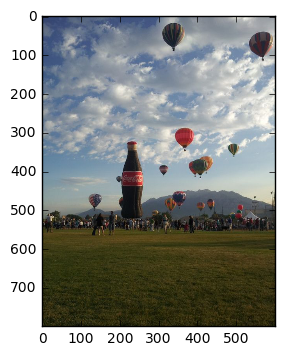

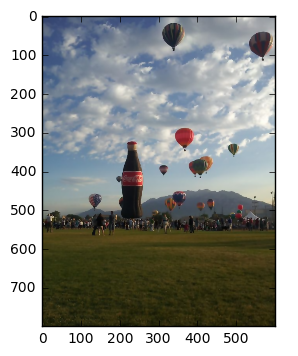

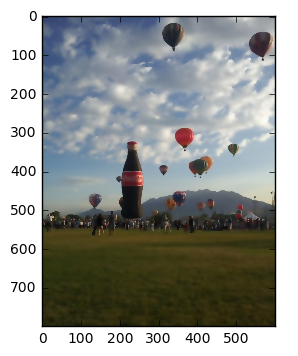

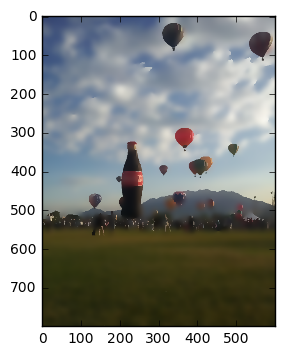

In [5]:
g = lambda x : np.exp(-(10*x)**2)
picture = plt.imread('balloon.jpg') * 1/255
plt.imshow(picture, cmap=plt.cm.gray)
plt.show()

anisdiff_color(picture, 5, .25, g)
anisdiff_color(picture, 20, .25, g)
anisdiff_color(picture, 100, .25, g)

## Problem 3
NOTE TO JOEY: the code that was provided in the lab for making a noisy image caused my function to not change the image at all. I had to use the following code to get the smoothing plus the noise.

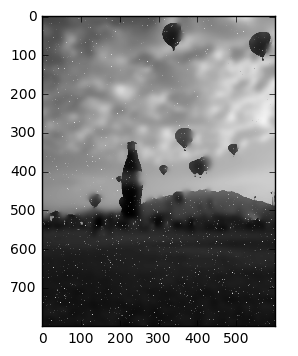

In [6]:
image = plt.imread("balloon.jpg").mean(axis=2) * 1/255
x, y = image.shape
for i in xrange(x*y//100):
    image[np.random.randint(x),np.random.randint(y)] = .5 + .5*np.random.random()
    
g = lambda x : np.exp(-(10*x)**2)
anisdiff_bw(image, 100, .25, g)

The noise in this image is not smoothed because the borders around the noisy pixels present large changes in value.  Therefore, by the nature of anisotrophic diffusion, these pixels will not be changed. In other words, the noisy pixels are not filtered out for the same reason the edge of the Coke bottle isn't smoothed.